In [50]:
!curl 'https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv' \
--output 'data/peyton.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 86845  100 86845    0     0   823k      0 --:--:-- --:--:-- --:--:--  823k


In [1]:
import numpy as np
import pandas as pd
from pandas import datetime, Series

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [65]:
df = pd.read_csv('data/peyton.csv',parse_dates=['ds'])
# df.dtypes
# df.head()
d1 = df.ds.min() + datetime.timedelta(days=730)
d2 = d1 + datetime.timedelta(days=365)
d3 = d1 + datetime.timedelta(days=180)
print(d1)
print(d2)
print(d3)
# df.ds.max()
# import datetime
# datetime.date(2007, 12, 5)
# # + datetime.timedelta(days=-30)

2009-12-09 00:00:00
2010-12-09 00:00:00
2010-06-07 00:00:00


In [ ]:
# read data set
df = pd.read_csv('data/email.csv',usecols=['Received','NumEmails'])
df["Received2"] =pd.to_datetime(df["Received"]).dt.normalize()
df.set_index('Received2',inplace=True)

In [ ]:
print("min:{}\tmax:{}".format(df.index.min(),df.index.max()))

In [ ]:
df = df['2017-08-01':'2017-11-30'].groupby(['Received2'])['NumEmails'].sum()
df.plot();

In [ ]:
from fbprophet import Prophet

# put into fbprophet format
df2 = pd.DataFrame([df]).transpose().reset_index()
df2.rename(index=str,columns={'Received2':'ds','NumEmails':'y'},inplace=True)
df2.head()

m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=0)
# future.tail()
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast);
fig1 = m.plot_components(forecast)

In [ ]:
#does this beat my arimaEmail Std error 31.82%

df3 = df2.merge(forecast[['ds','yhat']],on='ds',how='outer')
df3 = df3.set_index('ds')['2017-11-12':'2017-11-30']
df3.plot();

import math as math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(df3.y, df3.yhat))
if not math.isnan(rmse):
    print('Std error {:.2f}%'.format(rmse / np.mean(df3.y) * 100))

In [ ]:
?pd.to_datetime

In [9]:
df = pd.DataFrame({'year': [2015, 2016],
                    'month': [2, 3],
                    'day': [4, 5],
                   'hour': [2, 3]})
df.head()
pd.to_datetime(df[['year', 'month', 'day']])

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

/home/nathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


min: 1992-01-01 00:00:00, max: 2018-12-01 00:00:00
min: 2017-01-01 00:00:00, max: 2017-12-01 00:00:00


/home/nathan/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/home/nathan/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,y,yhat
0,2017-01-01,417240.0,416898.899297
1,2017-02-01,415051.0,415570.624708
2,2017-03-01,416008.0,416482.458247
3,2017-04-01,419071.0,417670.227465
4,2017-05-01,417639.0,418646.771232
5,2017-06-01,419949.0,419657.859012
6,2017-07-01,420845.0,420636.331383
7,2017-08-01,420685.0,421647.433263
8,2017-09-01,429566.0,429370.327670
9,2017-10-01,432104.0,431775.072799


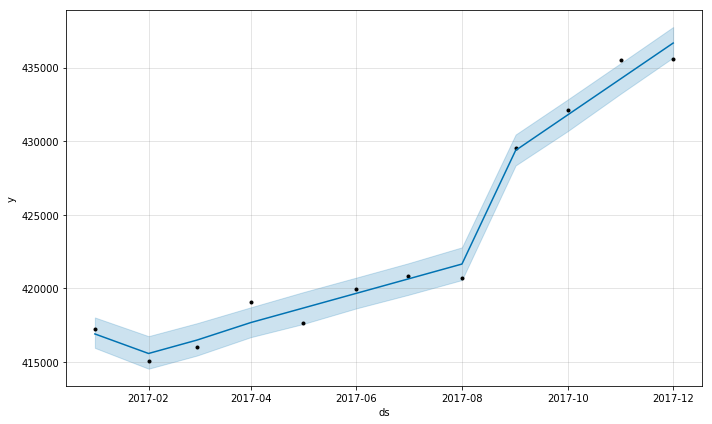

In [38]:
cols = [x for x in range(1,13)]
df = pd.read_csv('data/retail.txt',delimiter='   ',skiprows=1,header=None)
df = pd.melt(df,id_vars=[0],value_vars=cols)
df.columns = ['year','month','y']
df['day'] = 1
df['ds'] = pd.to_datetime(df[['year','month','day']])
df.drop(['year','month','day'],axis=1,inplace=True)
print("min: {}, max: {}".format(df.ds.min(),df.ds.max()))
#  fig = df.set_index('ds').plot()

df = df.set_index('ds')['2017'].reset_index()
print("min: {}, max: {}".format(df.ds.min(),df.ds.max()))
# fig = df.set_index('ds')['2017'].plot()
# df.head()


from fbprophet import Prophet
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=0)
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast);

df3 = df.merge(forecast[['ds','yhat']],on='ds',how='outer')
df3
# df3 = df3.set_index('ds')['2017-11-12':'2017-11-30']
# df3.plot();


# import math as math
# from sklearn.metrics import mean_squared_error

# rmse = math.sqrt(mean_squared_error(df3.y, df3.yhat))
# if not math.isnan(rmse):
#     print('Std error {:.2f}%'.format(rmse / np.mean(df3.y) * 100))

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 7.0.
/home/nathan/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/home/nathan/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,y,yhat
0,2017-01-01,417240.0,416669.806177
1,2017-02-01,415051.0,415718.613856
2,2017-03-01,416008.0,416599.075085
3,2017-04-01,419071.0,417581.066628
4,2017-05-01,417639.0,418531.381034
5,2017-06-01,419949.0,419754.651462
6,2017-07-01,420845.0,420945.237186
7,2017-08-01,420685.0,422568.406805
8,2017-09-01,429566.0,427219.027406
9,2017-10-01,432104.0,431719.627988


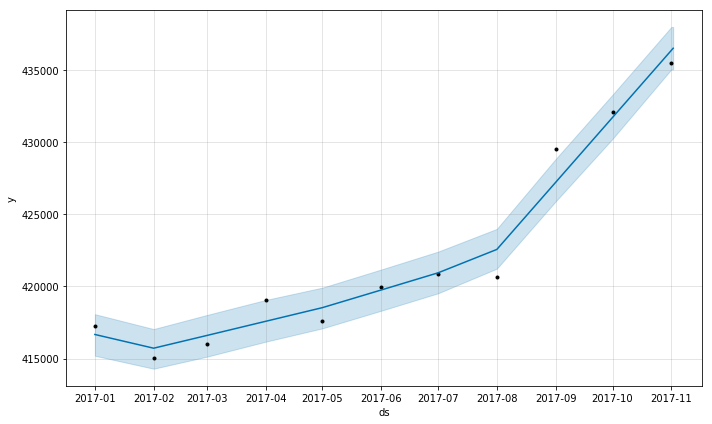

In [41]:
# act:435599.0
# pred:436664.721228
#pred:436520.268609

df = df.set_index('ds')['2017-01-01':'2017-11-30'].reset_index()

# from fbprophet import Prophet
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast);

df3 = df.merge(forecast[['ds','yhat']],on='ds',how='outer')
df3

In [42]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='11 months', period='30 days', horizon = '365 days')
df_cv.head()

ValueError: Less data than horizon.